In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Reading the file
# The source of the code can be found here: https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health
df = pd.read_csv('smmh.csv')
df.head(5)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


Data exploration, Cleaning, and Preperation

In [3]:
# Observing the shape of the file
df.shape

(481, 21)

In [4]:
# General information about the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [5]:
# Renaming the columns as they are difficult to use in this shape.

new_column_names = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship',
    '4. Occupation Status': 'occupation',
    '5. What type of organizations are you affiliated with?': 'affiliation',
    '6. Do you use social media?': 'use_sm',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'avg_sm_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'sm_no_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'sm_distracted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless_sm',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distractibility',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_level',
    '14. Do you find it difficult to concentrate on things?': 'difficult_concentrate',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_sm',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feeling_about_comparison',
    '17. How often do you look to seek validation from features of social media?': 'validation_sm',
    '18. How often do you feel depressed or down?': 'feeling_depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuate',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues',
}

df = df.rename(columns=new_column_names)

In [6]:
# Checking the columns
df.columns

Index(['timestamp', 'age', 'gender', 'relationship', 'occupation',
       'affiliation', 'use_sm', 'social_media_platforms', 'avg_sm_time',
       'sm_no_purpose', 'sm_distracted', 'restless_sm', 'distractibility',
       'worry_level', 'difficult_concentrate', 'compare_sm',
       'feeling_about_comparison', 'validation_sm', 'feeling_depressed',
       'interest_fluctuate', 'sleep_issues'],
      dtype='object')

In [7]:
# Looking for NaN values
df.isna().sum()

timestamp                    0
age                          0
gender                       0
relationship                 0
occupation                   0
affiliation                 30
use_sm                       0
social_media_platforms       0
avg_sm_time                  0
sm_no_purpose                0
sm_distracted                0
restless_sm                  0
distractibility              0
worry_level                  0
difficult_concentrate        0
compare_sm                   0
feeling_about_comparison     0
validation_sm                0
feeling_depressed            0
interest_fluctuate           0
sleep_issues                 0
dtype: int64

In [8]:
# Looking for duplicates in the data
df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 0 non-null      object 
 1   age                       0 non-null      float64
 2   gender                    0 non-null      object 
 3   relationship              0 non-null      object 
 4   occupation                0 non-null      object 
 5   affiliation               0 non-null      object 
 6   use_sm                    0 non-null      object 
 7   social_media_platforms    0 non-null      object 
 8   avg_sm_time               0 non-null      object 
 9   sm_no_purpose             0 non-null      int64  
 10  sm_distracted             0 non-null      int64  
 11  restless_sm               0 non-null      int64  
 12  distractibility           0 non-null      int64  
 13  worry_level               0 non-null      int64  
 14  difficult_concentrate     0

In [9]:
# Dropping unnecessary columns from the data
df.drop(columns= ['timestamp', 'affiliation'], inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       481 non-null    float64
 1   gender                    481 non-null    object 
 2   relationship              481 non-null    object 
 3   occupation                481 non-null    object 
 4   use_sm                    481 non-null    object 
 5   social_media_platforms    481 non-null    object 
 6   avg_sm_time               481 non-null    object 
 7   sm_no_purpose             481 non-null    int64  
 8   sm_distracted             481 non-null    int64  
 9   restless_sm               481 non-null    int64  
 10  distractibility           481 non-null    int64  
 11  worry_level               481 non-null    int64  
 12  difficult_concentrate     481 non-null    int64  
 13  compare_sm                481 non-null    int64  
 14  feeling_ab

In [11]:
# Changing data type of age from float to integer
df['age'] = df['age'].astype('int64')

In [12]:
#Cheking gender column.
df['gender'].value_counts()

gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

In [13]:
# Answering gender question to 'there are others???' is not a real answer. 
# It cannot be qualified to neither categories. I will therefore drop it.

df.drop(df.loc[df['gender'] =='There are others???'].index, inplace=True)

In [14]:
# Giving new values to gender column.
gender_v = {'Female' : 'female',
         'Male' : 'male',
         'Non-binary':'others',
         'Nonbinary ' : 'others',
         'NB' : 'others',
         'unsure ' : 'others',
         'Non binary ' : 'others',
         'Trans' : 'others'}

df['gender'] = df['gender'].replace(gender_v)

In [15]:
# Cheking social media use column
df['use_sm'].value_counts()

use_sm
Yes    477
No       3
Name: count, dtype: int64

In [16]:
# Recoding it with integer values.
df['use_sm'] = df['use_sm'].replace({'Yes': 1, 'No': 0})

In [17]:
# I drop non-social-media-users as the questions only look for social media users.
df.drop(df.loc[df['use_sm'] == 0].index, inplace=True)

In [18]:
# feeling about comparison variable connates a neutral meaning compared to other questions. All the other variables indicate 5 being the most negative, while here it indicates a positive meaning. Therefore, I reverse code the values.
# "Following the previous question, how do you feel about these comparisons, generally speaking?"
df['feeling_about_comparison'] = 6 - df['feeling_about_comparison']

df['feeling_about_comparison'].value_counts().astype('int64')

feeling_about_comparison
3    217
4    103
5     65
2     59
1     33
Name: count, dtype: int64

In [19]:
# Creating ADHD, Anxiety, Self-esteem, Depression score variables based on relevant questions.
# Creating a mental_health_prob_score column from the sum of ADHD,Anxiety, Self-esteem, and Depression score columns.
ADHD = ['sm_no_purpose', 'sm_distracted', 'distractibility', 'difficult_concentrate']
df['adhd_score'] = df[ADHD].sum(axis=1)
Anxiety = ['restless_sm', 'worry_level']
df['anxiety_score'] = df[Anxiety].sum(axis=1)
Self_esteem = ['compare_sm','feeling_about_comparison', 'validation_sm']
df['self_esteem_score'] = df[Self_esteem].sum(axis=1)
depression = ['feeling_depressed','interest_fluctuate', 'sleep_issues']
df['depression_score'] = df[depression].sum(axis=1)

total = ['adhd_score', 'anxiety_score', 'self_esteem_score', 'depression_score']

df['mental_health_prob_score'] = df[total].sum(axis =1)

In [20]:
# Dropping unnecessary columns.

df.drop(df.iloc[:, 7:19], inplace = True, axis = 1)

df

,age,gender,relationship,occupation,use_sm,social_media_platforms,avg_sm_time,adhd_score,anxiety_score,self_esteem_score,depression_score,mental_health_prob_score
0,21,male,In a relationship,University Student,1,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,7,14,43
1,21,female,Single,University Student,1,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,11,14,47
2,21,female,Single,University Student,1,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,11,6,7,11,35
3,21,female,Single,University Student,1,"Facebook, Instagram",More than 5 hours,12,6,12,9,39
4,21,female,Single,University Student,1,"Facebook, Instagram, YouTube",Between 2 and 3 hours,17,9,9,9,44
...,...,...,...,...,...,...,...,...,...,...,...,...
476,24,male,Single,Salaried Worker,1,"Facebook, Instagram, YouTube",Between 2 and 3 hours,15,6,12,11,44
477,26,female,Married,Salaried Worker,1,"Facebook, YouTube",Between 1 and 2 hours,10,6,12,9,37
478,29,female,Married,Salaried Worker,1,"Facebook, YouTube",Between 2 and 3 hours,12,6,10,6,34
479,21,male,Single,University Student,1,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,10,5,9,13,37


In [21]:
# Cheking average social media use. Leaving it as is for now to get better visuals.
df['avg_sm_time'].value_counts()

avg_sm_time
More than 5 hours        115
Between 2 and 3 hours    101
Between 3 and 4 hours     93
Between 1 and 2 hours     68
Between 4 and 5 hours     67
Less than an Hour         33
Name: count, dtype: int64

Exploratory Data Analysis (EDA)

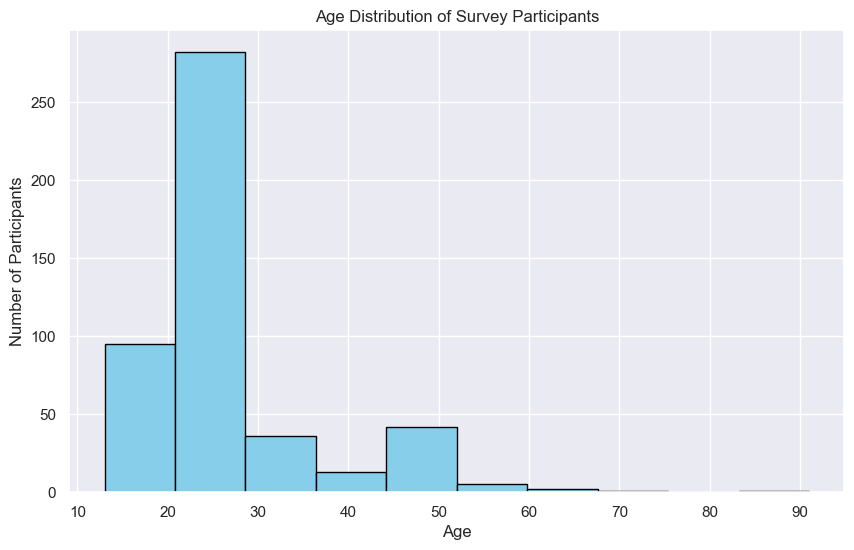

In [22]:
# Plotting age of survey participants.
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Survey Participants')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show()

In [23]:
df['age'].mean()

26.10691823899371

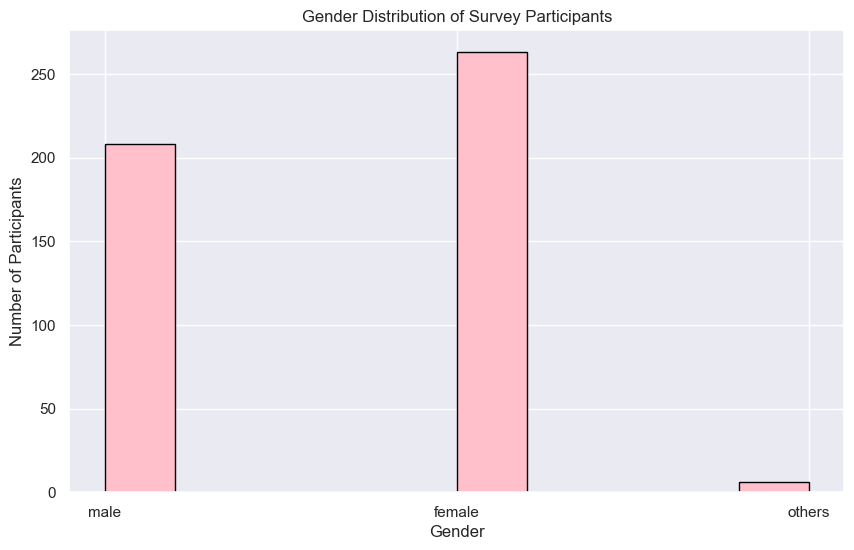

In [24]:
# Plotting gender of survey participants.
plt.figure(figsize=(10, 6))
plt.hist(df['gender'], bins=10, color='#FFC0CB', edgecolor='black')
plt.title('Gender Distribution of Survey Participants')
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.show()

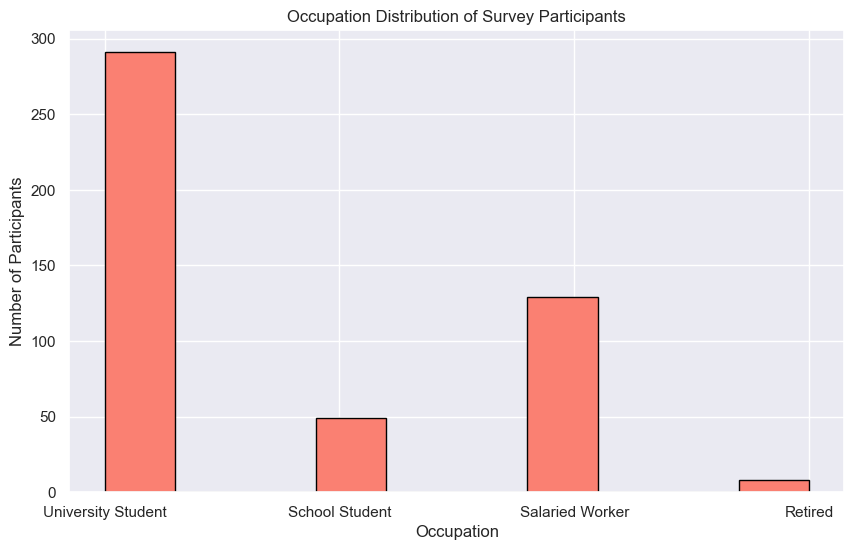

In [25]:
# Plotting occupations of survey participants.
plt.figure(figsize=(10, 6))
plt.hist(df['occupation'], bins=10, color='salmon', edgecolor='black')
plt.title('Occupation Distribution of Survey Participants')
plt.xlabel('Occupation')
plt.ylabel('Number of Participants')
plt.show()

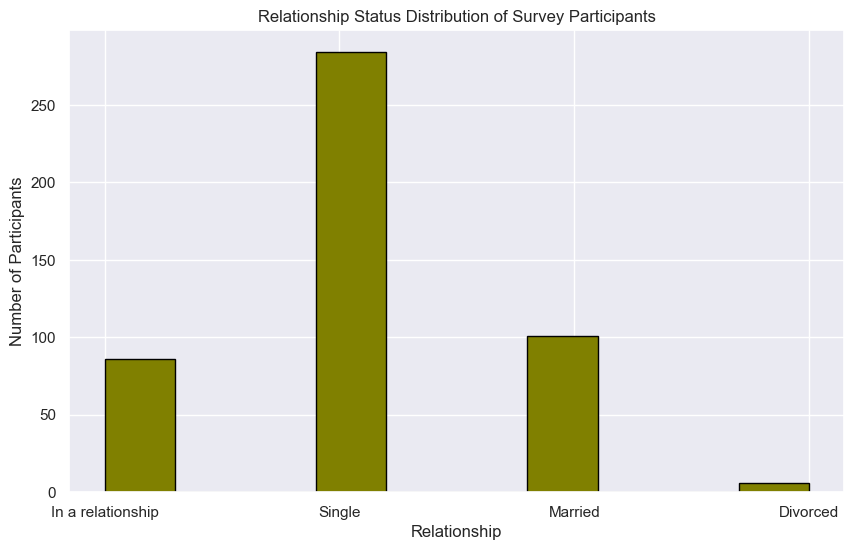

In [26]:
# Plotting relationship status of survey participants.
plt.figure(figsize=(10, 6))
plt.hist(df['relationship'], bins=10, color='olive', edgecolor='black')
plt.title('Relationship Status Distribution of Survey Participants')
plt.xlabel('Relationship')
plt.ylabel('Number of Participants')
plt.show()

Text(0, 0.5, 'Count')

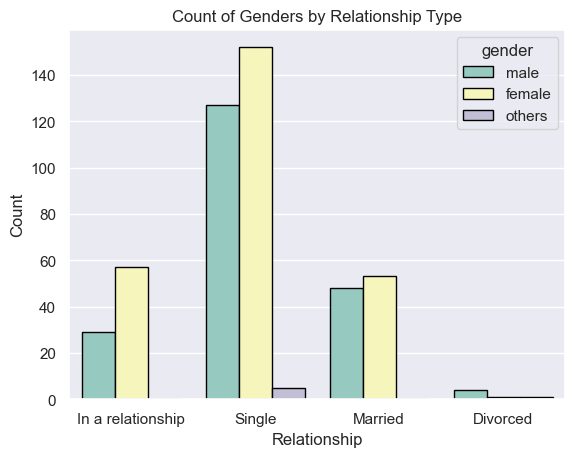

In [27]:
# Plotting relationship status and gender of survey participants.
sns.countplot(data=df, x = 'relationship', hue = 'gender', palette='Set3', edgecolor = 'black')
plt.title('Count of Genders by Relationship Type')
plt.xlabel('Relationship')
plt.ylabel('Count')

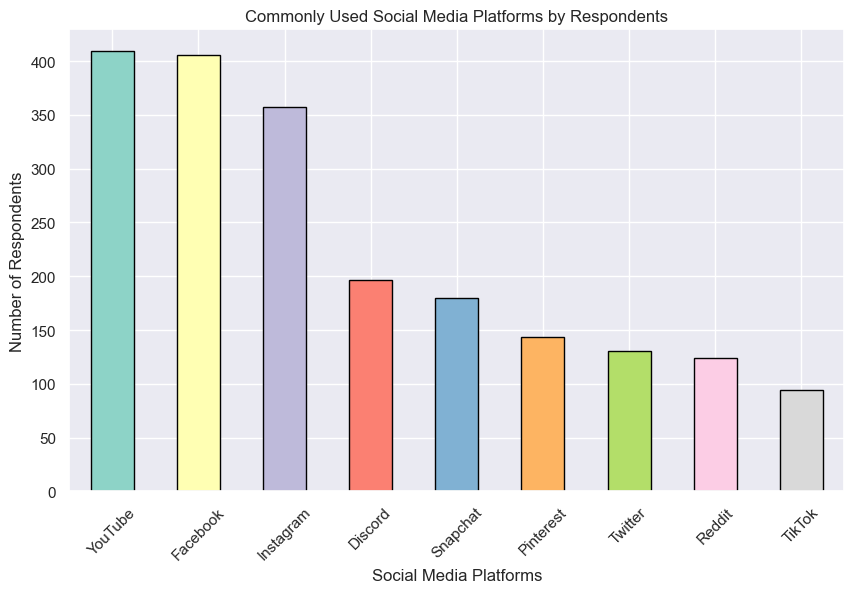

In [28]:
# Plotting survey participants sommonly use of social media platforms.
social_media_platforms = df['social_media_platforms'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
social_media_platforms.plot(kind='bar', color=plt.cm.Set3.colors, edgecolor='black')
plt.title('Commonly Used Social Media Platforms by Respondents')
plt.xlabel('Social Media Platforms')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


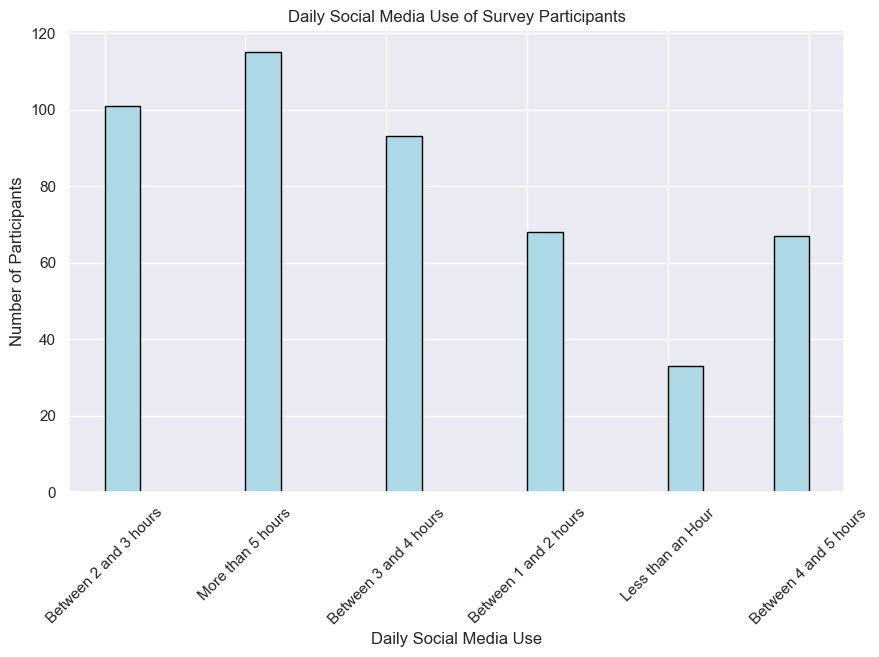

In [29]:
# Plotting daily use of social media time of survey participants.
plt.figure(figsize=(10, 6))
plt.hist(df['avg_sm_time'], bins=20, color='#ADD8E6', edgecolor='black')
plt.title('Daily Social Media Use of Survey Participants')
plt.xlabel('Daily Social Media Use')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Between 2 and 3 hours'),
  Text(1, 0, 'More than 5 hours'),
  Text(2, 0, 'Between 3 and 4 hours'),
  Text(3, 0, 'Between 1 and 2 hours'),
  Text(4, 0, 'Less than an Hour'),
  Text(5, 0, 'Between 4 and 5 hours')])

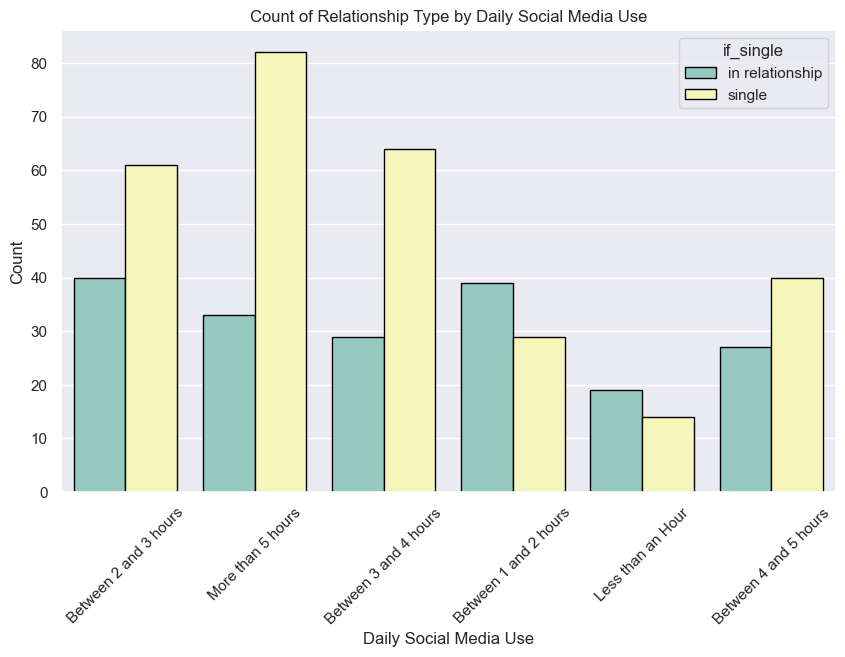

In [30]:
# Plotting daily use of social media by relationship status of survey participants.

df['if_single'] = df['relationship'].replace({'Married': 'in relationship',
'In a relationship': 'in relationship',
'Single': 'single',
'Divorced': 'single'})

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='avg_sm_time', hue='if_single', palette='Set3', edgecolor = 'black')

plt.title('Count of Relationship Type by Daily Social Media Use')
plt.xlabel('Daily Social Media Use')
plt.ylabel('Count')
plt.xticks(rotation=45)

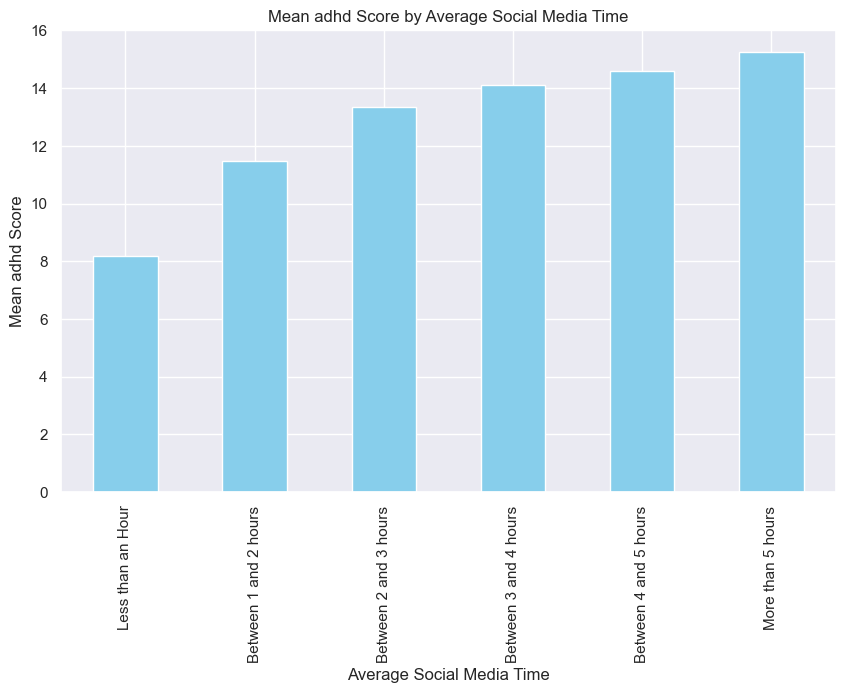

In [31]:
# Creating a plot to see the relationship between adhd score and average social media use
grouped_data = df.groupby('avg_sm_time')['adhd_score'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Mean adhd Score by Average Social Media Time')
plt.xlabel('Average Social Media Time')
plt.ylabel('Mean adhd Score')
plt.show()

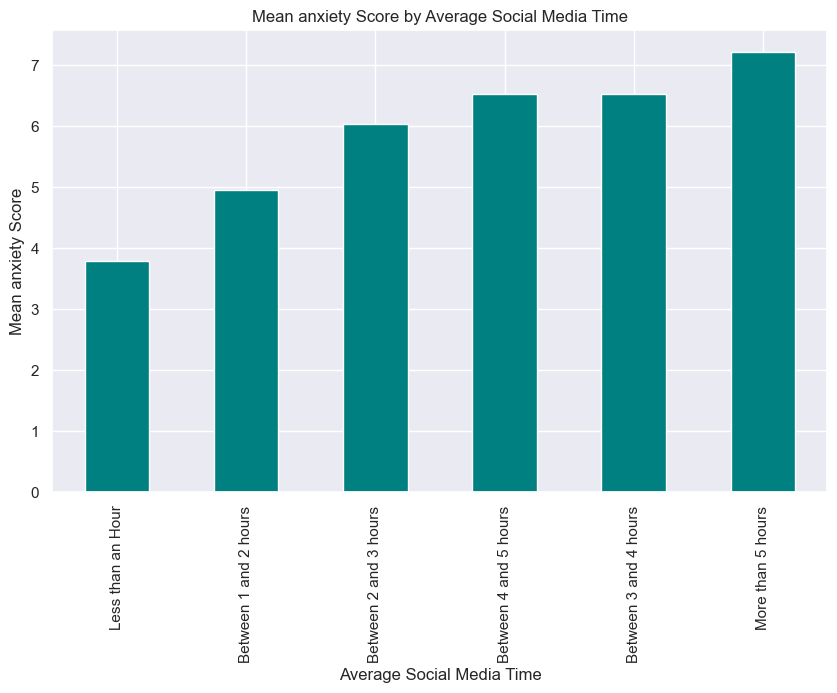

In [32]:
# Creating a plot to see the relationship between anxiety score and average social media use
grouped_data = df.groupby('avg_sm_time')['anxiety_score'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='teal')
plt.title('Mean anxiety Score by Average Social Media Time')
plt.xlabel('Average Social Media Time')
plt.ylabel('Mean anxiety Score')
plt.show()

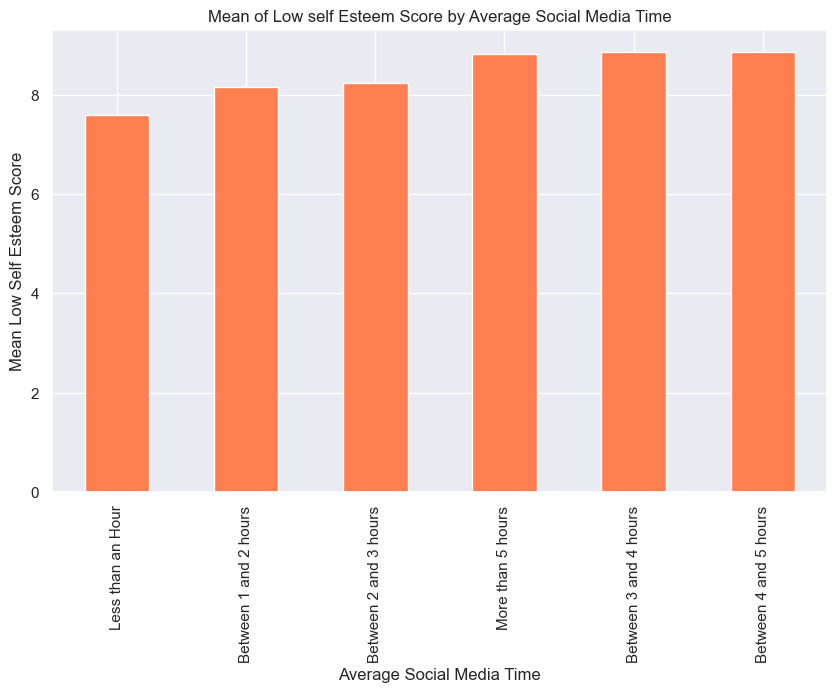

In [33]:
# Creating a plot to see the relationship between low self esteem score and average social media use
grouped_data = df.groupby('avg_sm_time')['self_esteem_score'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='coral')
plt.title('Mean of Low self Esteem Score by Average Social Media Time')
plt.xlabel('Average Social Media Time')
plt.ylabel('Mean Low Self Esteem Score')
plt.show()

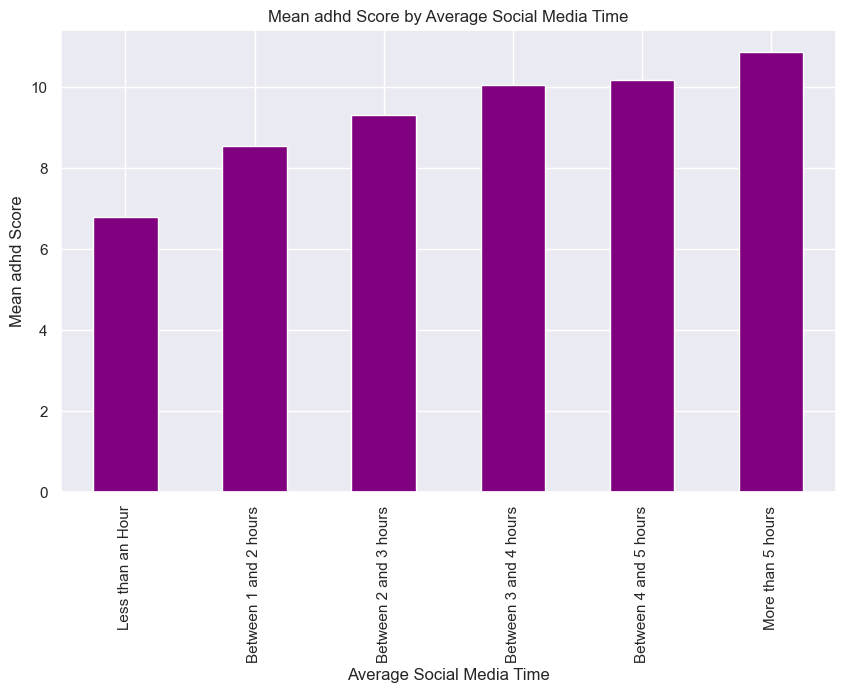

In [34]:
# Creating a plot to see the relationship between depression score and average social media use
grouped_data = df.groupby('avg_sm_time')['depression_score'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='purple')
plt.title('Mean adhd Score by Average Social Media Time')
plt.xlabel('Average Social Media Time')
plt.ylabel('Mean adhd Score')
plt.show()

Clustering Method Regarding Social Media Use and Mental Health Issues

In [35]:
# Creating a new integer type variable for daily average social meadia use for analysis.

df['avg_sm'] = df['avg_sm_time'].replace({'Less than an Hour' : 1,
                                          'Between 1 and 2 hours' : 2,
                                          'Between 2 and 3 hours': 3,
                                          'Between 3 and 4 hours': 4,
                                          'Between 4 and 5 hours': 5,
                                          'More than 5 hours': 6})

df['avg_sm'].value_counts()

avg_sm
6    115
3    101
4     93
2     68
5     67
1     33
Name: count, dtype: int64

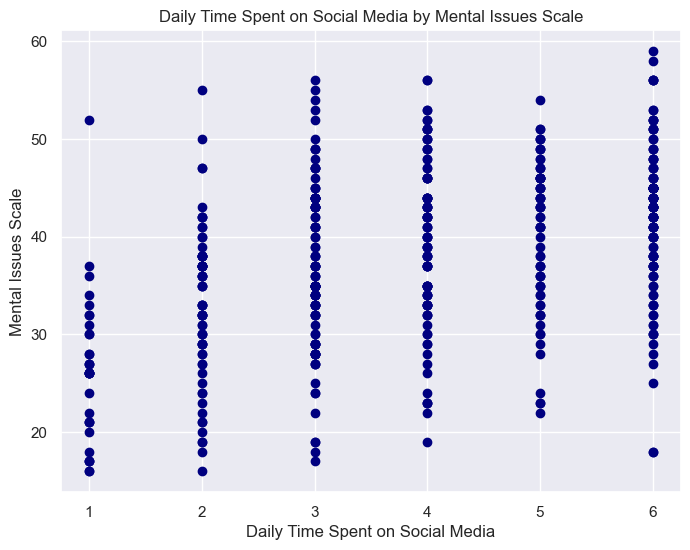

In [36]:
# Plotting Daily Time Spent on Social Media by Mental Issues Scale 
x = df['avg_sm']
y = df['mental_health_prob_score']

plt.figure(figsize=(8,6))
plt.scatter(x, y, color = 'navy', marker = 'o', label = 'Cunjuctrue points')

plt.title('Daily Time Spent on Social Media by Mental Issues Scale')
plt.xlabel('Daily Time Spent on Social Media')
plt.ylabel('Mental Issues Scale')
plt.show()

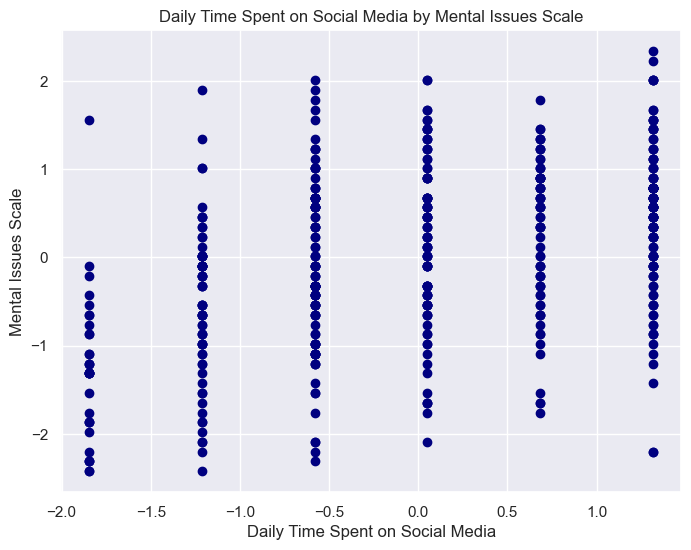

In [37]:
# Standardizing the variables and plotting them.

from sklearn.preprocessing import StandardScaler

X = df[['avg_sm', 'mental_health_prob_score']]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_standardized = pd.DataFrame(X_standardized, columns=['avg_sm', 'mental_health_prob_score'])

plt.figure(figsize=(8,6))
plt.scatter(X_standardized['avg_sm'], X_standardized['mental_health_prob_score'], color = 'navy', marker = 'o', label = 'Cunjuctrue points')

plt.title('Daily Time Spent on Social Media by Mental Issues Scale')
plt.xlabel('Daily Time Spent on Social Media')
plt.ylabel('Mental Issues Scale')
plt.show()

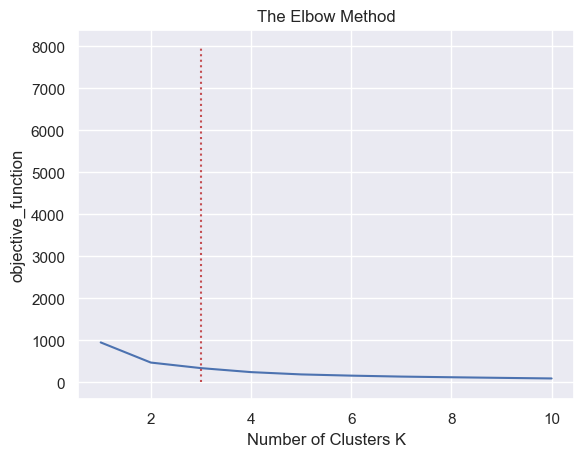

In [38]:
# For k-means clustering method, I am trying to find the best cluster numbers using elbow method.

from sklearn.cluster import KMeans

objective_function=[]
for i in range(1,11):
    clustering=KMeans(n_clusters=i, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0)
    clustering.fit(X_standardized)
    objective_function.append(clustering.inertia_)

plt.plot(range(1,11),objective_function)
plt.vlines(3, 1, 8000, linestyles ="dotted", colors ="r")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters K")
plt.ylabel("objective_function")
plt.show()

In [39]:
# Applying k-means clustering with 3 clusters.
kmeans = KMeans(3)
kmeans.fit(X_standardized)
clusters_df = df.copy()
clusters_df['clusters_pred'] = kmeans.fit_predict(X_standardized)

c:\Users\Zeynep Büşra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Zeynep Büşra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


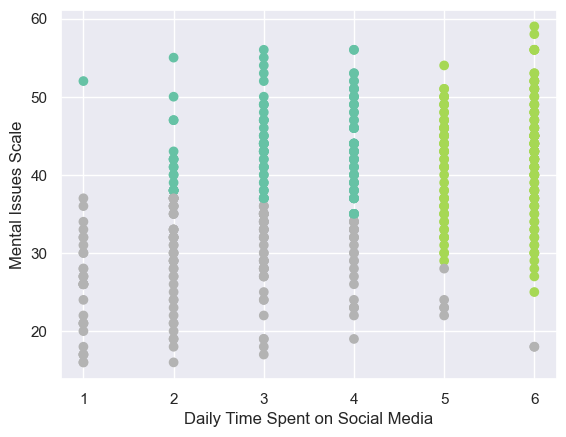

In [40]:
# Plotting the clusters
plt.scatter(clusters_df['avg_sm'], clusters_df['mental_health_prob_score'], c =clusters_df['clusters_pred'], cmap = 'Set2')
plt.xlabel('Daily Time Spent on Social Media')
plt.ylabel('Mental Issues Scale')
plt.show()

Characteristics of Clusters

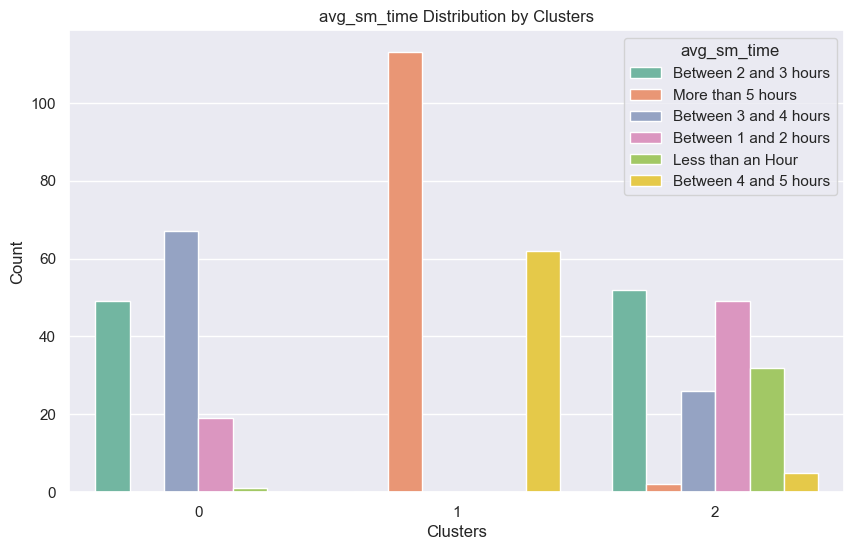

In [41]:
# Exploring the clusters and visualizing them based on average social media use.
plt.figure(figsize=(10, 6))
sns.countplot(x='clusters_pred', hue='avg_sm_time', data=clusters_df, palette='Set2')

plt.title('avg_sm_time Distribution by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.legend(title='avg_sm_time')
plt.show()

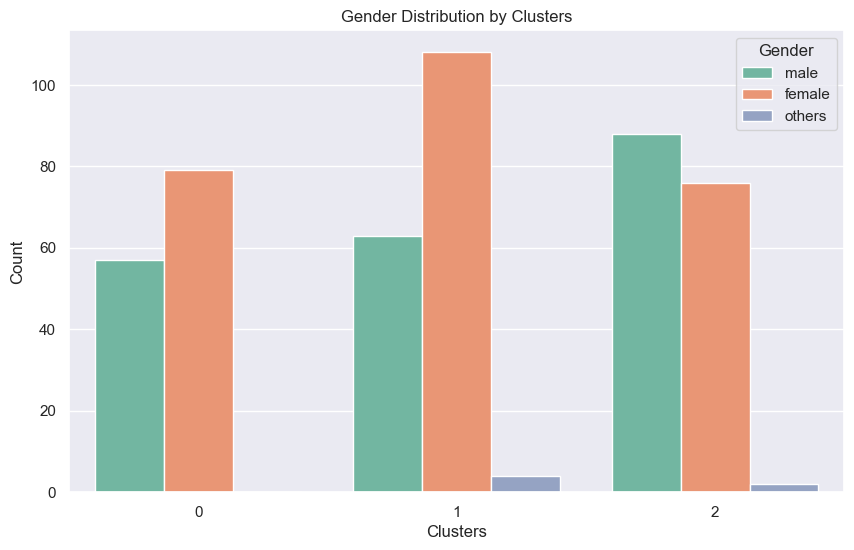

In [42]:
# Exploring the clusters and visualizing them based on gender.
plt.figure(figsize=(10, 6))
sns.countplot(x='clusters_pred', hue='gender', data=clusters_df, palette='Set2')

plt.title('Gender Distribution by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

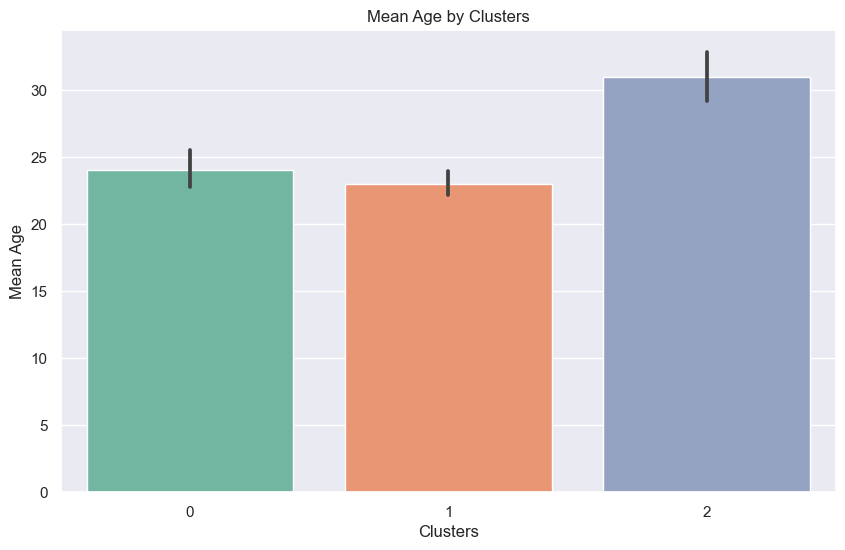

In [43]:
# Exploring the clusters and visualizing them based on age.
plt.figure(figsize=(10, 6))
sns.barplot(x='clusters_pred', y='age', data=clusters_df, palette='Set2')

# Customize the plot
plt.title('Mean Age by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Mean Age')

# Show the plot
plt.show()

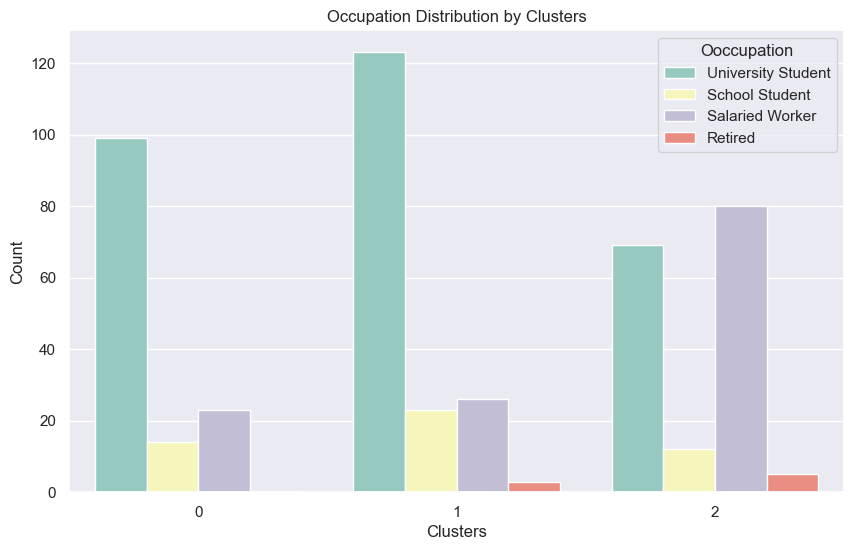

In [44]:
# Exploring the clusters and visualizing them based on occupation.
plt.figure(figsize=(10, 6))
sns.countplot(x='clusters_pred', hue='occupation', data=clusters_df, palette='Set3')

plt.title('Occupation Distribution by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.legend(title='Ooccupation')
plt.show()

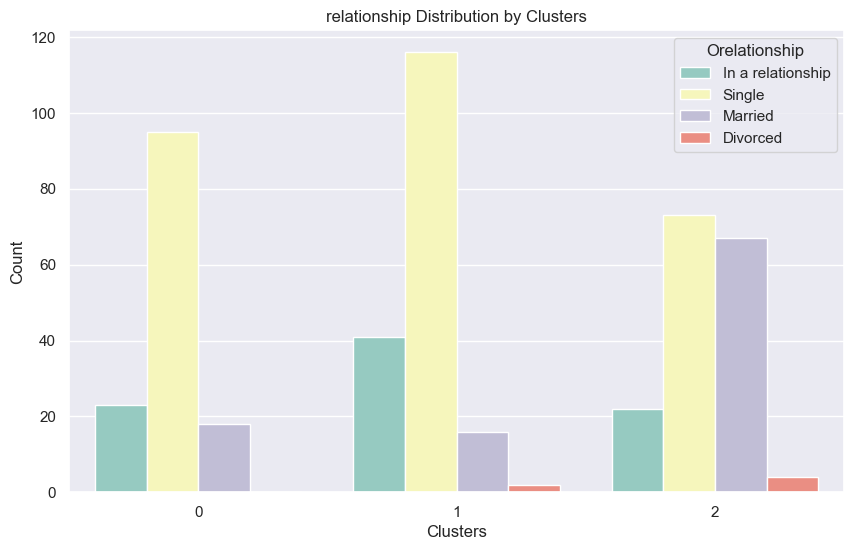

In [45]:
# Exploring the clusters and visualizing them based on relationship status.
plt.figure(figsize=(10, 6))
sns.countplot(x='clusters_pred', hue='relationship', data=clusters_df, palette='Set3')

plt.title('relationship Distribution by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.legend(title='Orelationship')
plt.show()

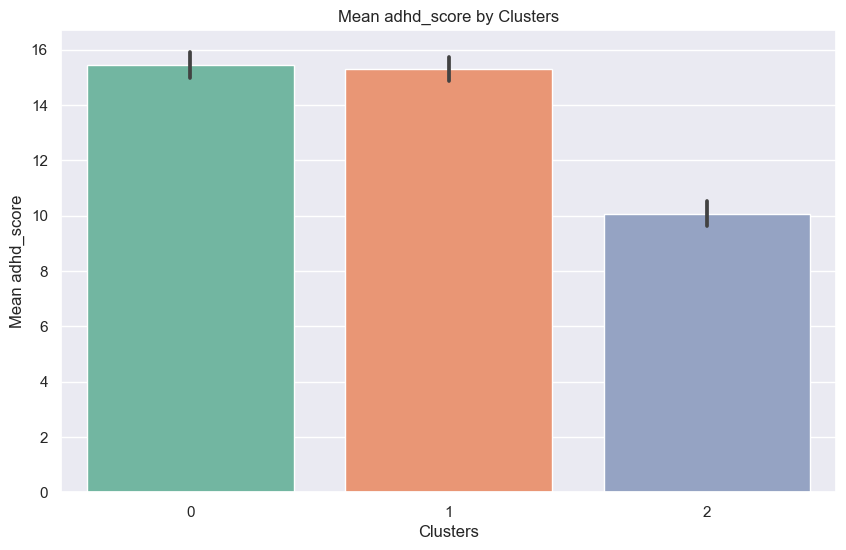

In [46]:
# Exploring the clusters and visualizing them based on adhd score.
plt.figure(figsize=(10, 6))
sns.barplot(x='clusters_pred', y='adhd_score', data=clusters_df, palette='Set2')

# Customize the plot
plt.title('Mean adhd_score by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Mean adhd_score')

# Show the plot
plt.show()

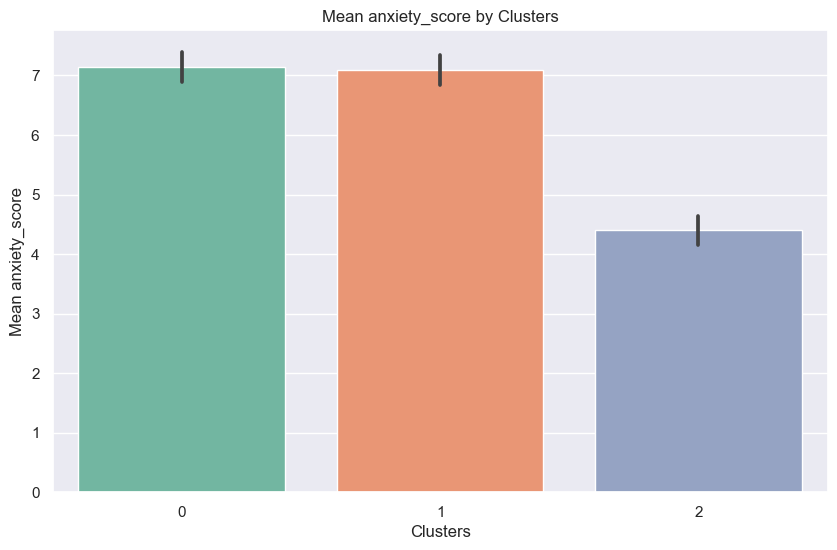

In [47]:
# Exploring the clusters and visualizing them based on anxiety score.
plt.figure(figsize=(10, 6))
sns.barplot(x='clusters_pred', y='anxiety_score', data=clusters_df, palette='Set2')

# Customize the plot
plt.title('Mean anxiety_score by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Mean anxiety_score')

# Show the plot
plt.show()

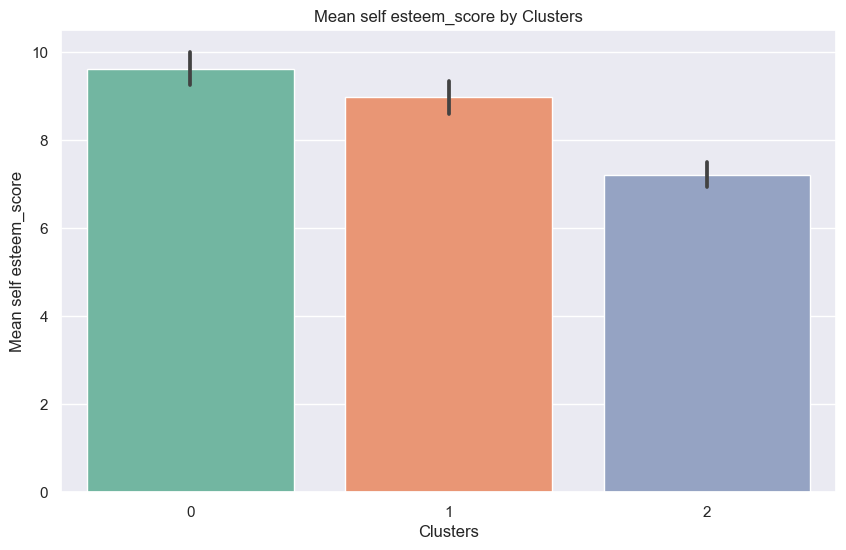

In [48]:
# Exploring the clusters and visualizing them based on low self esteem score.
plt.figure(figsize=(10, 6))
sns.barplot(x='clusters_pred', y='self_esteem_score', data=clusters_df, palette='Set2')

# Customize the plot
plt.title('Mean self esteem_score by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Mean self esteem_score')

# Show the plot
plt.show()

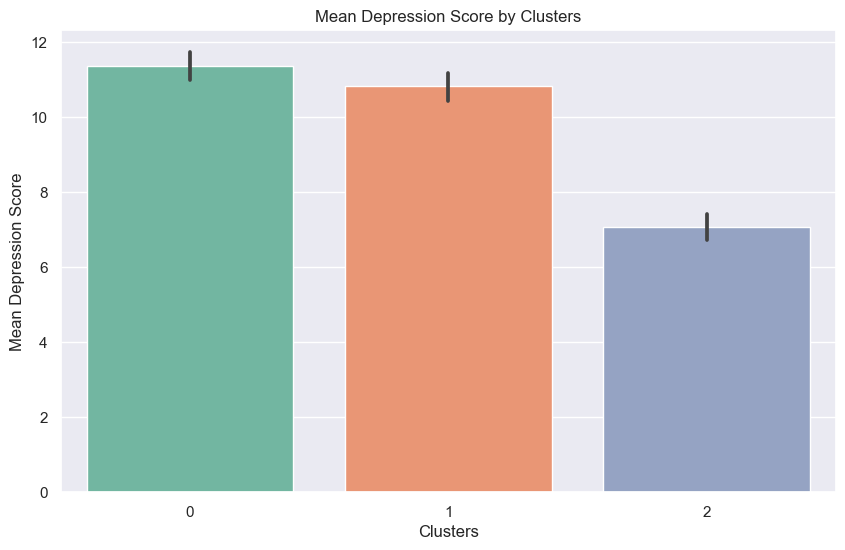

In [49]:
# Exploring the clusters and visualizing them based on depression score.
plt.figure(figsize=(10, 6))
sns.barplot(x='clusters_pred', y='depression_score', data=clusters_df, palette='Set2')

# Customize the plot
plt.title('Mean Depression Score by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Mean Depression Score')

# Show the plot
plt.show()

Advanced Statistics

In [50]:
# Creating a new variable based on mental_Health_prob_score. 
# For cut off I choose 42. The variable is based on 12 other variables which ranges from 1-5. 
# If a person answers all of the questions as neutral, it would be 36. If answers all of them as 4, it would be 48. I choose the number in between, which is 42. 
# If it is 42 and higher, that means this person needs psy counselling


def map_score(i):
  if i < 42:
    return "0"
  elif i >= 42:
    return "1"

clusters_df['needs_counselling'] = clusters_df['mental_health_prob_score'].apply(lambda i: map_score(i))
clusters_df['needs_counselling'] = clusters_df['needs_counselling'].astype('int64')

In [51]:
# Creating new integer variable based on gender to include it to the analysis.
clusters_df['gender_num'] = clusters_df['gender'].replace({'female' : 1,
'male': 2,
'others': 3})

In [52]:
# Creating the initial data frame to run the analysis.
data = clusters_df[['avg_sm', 'age', 'gender_num', 'adhd_score', 'anxiety_score', 'self_esteem_score', 'depression_score', 'needs_counselling']]

In [53]:
# Showing the first 5 rows of the data in detail.
data.head(5)

,avg_sm,age,gender_num,adhd_score,anxiety_score,self_esteem_score,depression_score,needs_counselling
0,3,21,2,18,4,7,14,1
1,6,21,1,15,7,11,14,1
2,4,21,1,11,6,7,11,0
3,6,21,1,12,6,12,9,0
4,3,21,1,17,9,9,9,1


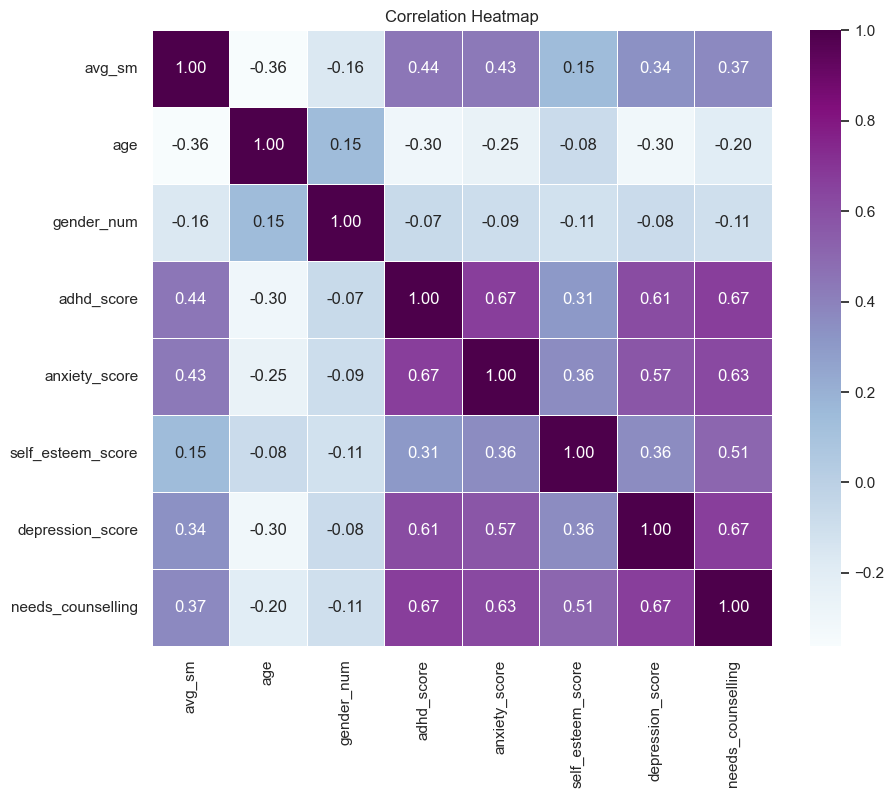

In [54]:
# Checking for correlations.
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [55]:
# ADHD and anxiety have a very high correlation, this can lead to collinearity problem. I won't include ADHD to the regression analysis.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data[['avg_sm', 'age', 'gender_num', 'anxiety_score', 'self_esteem_score', 'depression_score']]
y = data['needs_counselling']
# I split the data to train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2,random_state=22)

In [56]:
# I run the regression analysis
# I look for the correlation matrix.


model = LogisticRegression()
model.fit(X_train, y_train)

predicted= model.predict(X_test)
accuracy= model.score(X_test,y_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[57  5]
 [ 4 30]]


In [57]:
# I print the accuracy of logistic regression.
print("Accuracy of Logistic Regression: ",metrics.accuracy_score(y_test, predicted))

Accuracy of Logistic Regression:  0.90625
